base0.tif 尺寸: (2304, 4096)
base1.tif 尺寸: (2304, 4096)
base2.tif 尺寸: (2304, 4096)
base3.tif 尺寸: (2304, 4096)
base4.tif 尺寸: (2304, 4096)
圆心点的坐标为: (1138, 1480)
原点: (1147, 1002), 对称点: (1129, 1958)
检查点: (1472, 1145), 距离: 882.3933363302332
检查点: (1142, 1955), 距离: 13.341664064126334
原点: (1472, 1145), 对称点: (804, 1815)
检查点: (1142, 1955), 距离: 365.84696254034964
检查点: (820, 1140), 距离: 675.1896030005202
检查点: (1605, 1482), 距离: 867.4618147215473
检查点: (1467, 1818), 距离: 663.0067872955751
原点: (1142, 1955), 对称点: (1134, 1005)
检查点: (1472, 1145), 距离: 365.84696254034964
检查点: (820, 1140), 距离: 341.79087173299405
检查点: (1605, 1482), 距离: 670.3506545085191
检查点: (1467, 1818), 距离: 878.554494610323
原点: (820, 1140), 对称点: (1456, 1820)
检查点: (1472, 1145), 距离: 675.1896030005202
检查点: (1142, 1955), 距离: 341.79087173299405
检查点: (1605, 1482), 距离: 369.3846233940985
检查点: (1467, 1818), 距离: 11.180339887498949
原点: (1605, 1482), 对称点: (671, 1478)
检查点: (1472, 1145), 距离: 867.4618147215473
检查点: (1142, 1955), 距离: 670.3506545085191
检查点: (1

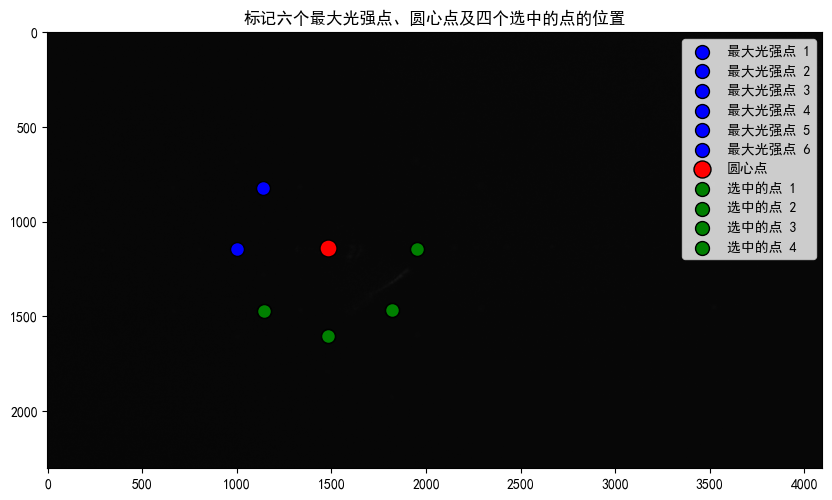

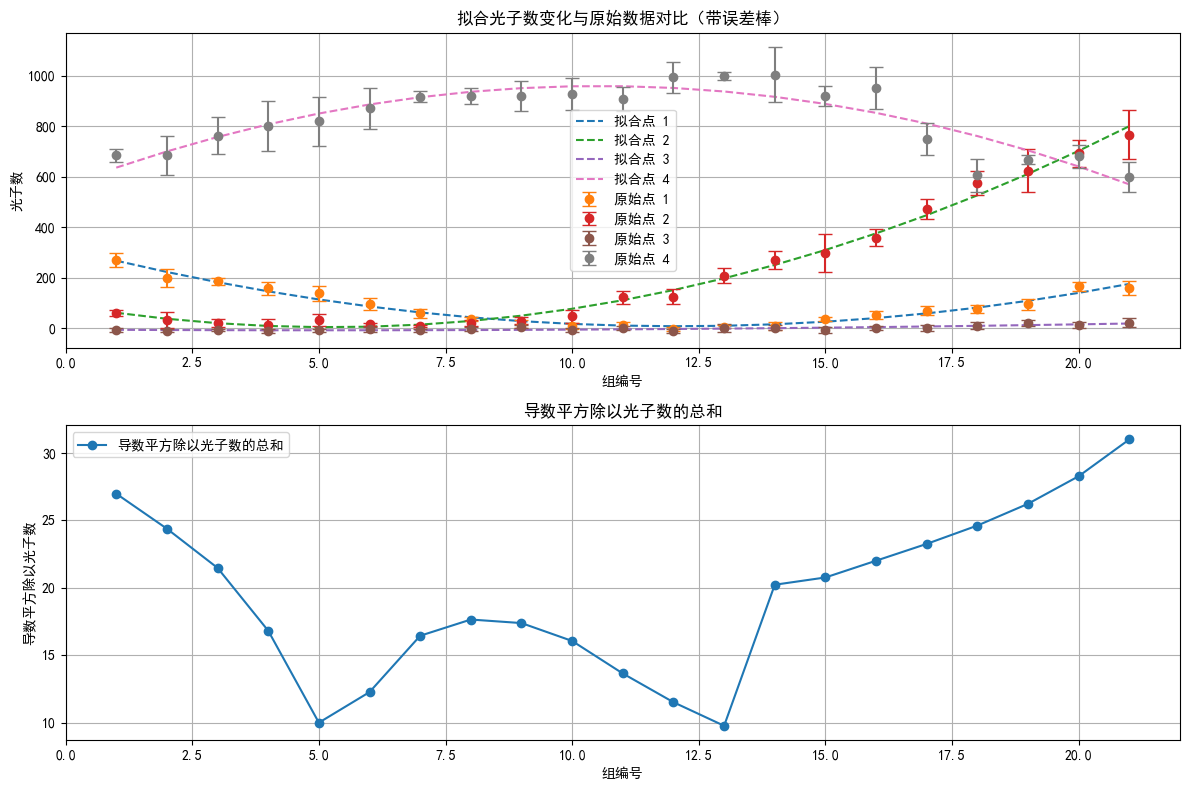

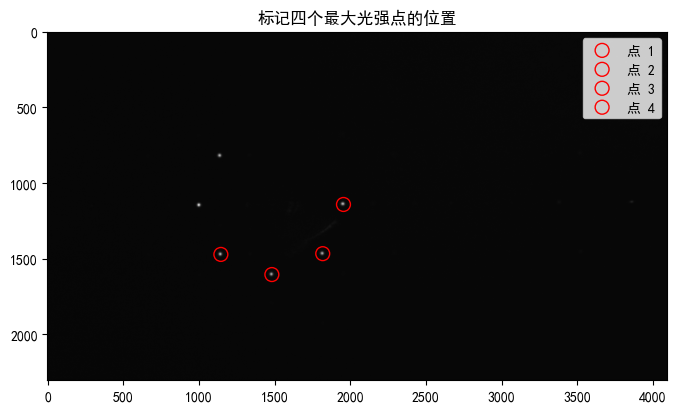

NameError: name 'finalfour_positions' is not defined

In [19]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'
# 使用SimHei字体显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
# 读取base0到base4的图片并进行和操作
base_file_path = r'C:\Users\wkx\Desktop\wkx1\数据\量子成像\9.19\base0.tif'  # 具体的图片文件路径
base_image = Image.open(base_file_path)
base_data = np.array(base_image)
base_data_sum = np.zeros_like(base_data)
# 设置打印选项
np.set_printoptions(formatter={'all': lambda x: int(x)})
# 逐个读取文件并检查尺寸是否一致
for i in range(5):
    base_file_path = f'C:\\Users\\wkx\\Desktop\\wkx1\\数据\\量子成像\\9.19\\base{i}.tif'
    base_image = Image.open(base_file_path)
    base_data = np.array(base_image)
    
    # 输出每张图片的尺寸进行检查
    print(f"base{i}.tif 尺寸: {base_data.shape}")
    
    # 确保所有图片尺寸一致
    if base_data.shape != base_data_sum.shape:
        raise ValueError(f"base{i}.tif 图片尺寸不一致！期望尺寸为 {base_data_sum.shape}，实际尺寸为 {base_data.shape}")
    
    base_data_sum += base_data

# 找到base图像中光强最大的6个点，确保这些点之间的距离不小于50
def find_six_intensity_points(image_data, n=6, min_distance=50):
    top_values = []
    top_positions = []

    for _ in range(n):
        while True:
            max_intensity = np.max(image_data)
            max_position = np.unravel_index(np.argmax(image_data), image_data.shape)

            # 确保新找到的点与已有的点的距离大于 min_distance
            if len(top_positions) > 0:
                if any(np.linalg.norm(np.array(max_position) - np.array(pos)) < min_distance for pos in top_positions):
                    image_data[max_position] = 0
                    continue

            top_values.append(max_intensity)
            top_positions.append(max_position)
            image_data[max_position] = 0
            break

    return top_positions

# 找到最大光强的六个点
six_positions = find_six_intensity_points(base_data_sum.copy(), n=6)

# 计算圆心的位置
def calculate_circle_center(positions):
    from scipy.optimize import leastsq

    def circle_residuals(params, points):
        xc, yc, r = params
        return np.sqrt((points[:, 0] - xc) ** 2 + (points[:, 1] - yc) ** 2) - r

    x = np.array([p[1] for p in positions])
    y = np.array([p[0] for p in positions])
    points = np.vstack((x, y)).T
    initial_guess = [np.mean(x), np.mean(y), np.mean(np.sqrt((x - np.mean(x))**2 + (y - np.mean(y))**2))]

    params, _ = leastsq(circle_residuals, initial_guess, args=(points,))
    return params[0], params[1]

center_x, center_y = calculate_circle_center(six_positions)
center = (int(center_y), int(center_x))
print(f"圆心点的坐标为: {center}")

# 过滤对称点
def filter_symmetrical_points(positions, center, min_symmetric_distance=100):
    four_positions = []
    used = set()  # 跟踪已经检查并移除的点
    
    for i, pos in enumerate(positions):
        if i in used:
            continue  # 跳过已经处理过的点

        symmetric_position = (2 * center[0] - pos[0], 2 * center[1] - pos[1])
        print(f"原点: ({int(pos[0])}, {int(pos[1])}), 对称点: ({int(symmetric_position[0])}, {int(symmetric_position[1])})")
        
        # 检查对称点与其他点的距离
        is_symmetric_found = False
        for j, other_pos in enumerate(positions):
            if i != j and j not in used:
                distance = np.linalg.norm(np.array(symmetric_position) - np.array(other_pos))
                print(f"检查点: {int(other_pos[0]),int(other_pos[1])}, 距离: {distance}")
                
                # 如果找到小于指定距离的点，则移除检查点
                if distance < min_symmetric_distance:
                    is_symmetric_found = True
                    used.add(i)  # 只移除当前检查点，不移除对称点
                    break
        
        # 如果没有找到满足条件的对称点，则保留该点
        if not is_symmetric_found:
            four_positions.append(pos)
    
    return four_positions

four_positions = filter_symmetrical_points(six_positions, center)
print(f"过滤后的点坐标为: {[(int(pos[0]), int(pos[1])) for pos in four_positions]}")  # 转换为整数


# 绘制标记六个最大光强点、中心点和四个选出的点的位置
plt.figure(figsize=(10, 10))
plt.imshow(base_data_sum, cmap='gray')

# 绘制六个最大光强点
for i, pos in enumerate(six_positions, start=1):
    plt.scatter(pos[1], pos[0], s=100, color='blue', edgecolor='black', label=f'最大光强点 {i}')  # 标记点的位置

# 绘制圆心点
plt.scatter(center[1], center[0], s=150, color='red', edgecolor='black', label='圆心点')  # 标记圆心点的位置

# 绘制四个光强最大点（过滤后的点）
for i, pos in enumerate(four_positions, start=1):
    plt.scatter(pos[1], pos[0], s=100, color='green', edgecolor='black', label=f'选中的点 {i}')  # 标记点的位置

plt.title('标记六个最大光强点、圆心点及四个选中的点的位置')  # 标题
plt.legend(loc='best')  # 显示图例
plt.show()

# 第二步：计算底噪值
def calculate_noise(image_data_list):
    total_noise_sum = 0

    # 遍历每个base图像数据
    for image_data in image_data_list:
        # 选择四个4x4区域
        corners = [
            image_data[120:124, 120:124],  # 左上角
            image_data[120:124, -124:-120],  # 右上角
            image_data[-124:-120, 120:124],  # 左下角
            image_data[-124:-120, -124:-120],  # 右下角
        ]

        # 对每个4x4区域求和
        for corner in corners:
            total_noise_sum += corner.sum()

    # 计算单个像素点的噪声平均值
    # 总和除以 5(base文件数) * 4(区域数) * 16(4×4区域内像素数)
    total_pixel_count = len(image_data_list) * 4 * 16
    noise_average = total_noise_sum / total_pixel_count

    return noise_average
    
# 将 base 图像数据列表传入 calculate_noise 计算底噪
base_images = [np.array(Image.open(f'C:\\Users\\wkx\\Desktop\\wkx1\\数据\\量子成像\\9.19\\base{i}.tif')) for i in range(5)]
noise_average = calculate_noise(base_images)

# 第三步：处理 result 文件，每五个连续的 result 文件为一组
result_path = r'C:\Users\wkx\Desktop\wkx1\数据\量子成像\9.19'
total_results = 105  # 假设共有 105 个 result 文件
group_size = 5  # 每 5 个为一组

# 初始化字典来记录每个点的光强值
point_intensity_values = {pos: [] for pos in four_positions}

for group_start in range(1, total_results + 1, group_size):
    group_intensity = {pos: [] for pos in four_positions}
    
    for i in range(group_start, min(group_start + group_size, total_results + 1)):
        result_file_path = os.path.join(result_path, f'aresult{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        # 对每个选定点，寻找 3×3 区域内的最小光强值
        for pos in four_positions:
            center_x, center_y = pos
            x_min = max(center_x - 1, 0)
            x_max = min(center_x + 2, result_data.shape[0])
            y_min = max(center_y - 1, 0)
            y_max = min(center_y + 2, result_data.shape[1])

            region = result_data[x_min:x_max, y_min:y_max]
            min_value = np.min(region)

            # 记录最小值并计算减去底噪后的值
            group_intensity[pos].append(min_value - noise_average)

    # 对每组的点光强求平均值和方差
    for pos in four_positions:
        point_intensity_values[pos].append((np.mean(group_intensity[pos]), np.std(group_intensity[pos])))

# 第四步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数
fitted_values = {pos: [] for pos in four_positions}
photon_derivatives_ratio_fitted = {pos: [] for pos in four_positions}

sum_photon_derivatives_ratio = np.zeros(len(point_intensity_values[four_positions[0]]))

for position in four_positions:
    means = np.array([mean for mean, std in point_intensity_values[position]])
    x = np.arange(1, len(means) + 1)

    # 多项式拟合
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)

    # 计算拟合值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means

    # 计算导数及其平方除以光子数
    derivative_poly = np.polyder(poly)
    derivatives_fitted = derivative_poly(x)
    derivatives_squared_fitted = derivatives_fitted ** 2

    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted

    sum_photon_derivatives_ratio += ratio_fitted

# 绘制拟合后的光子数变化和原始数据对比
plt.figure(figsize=(12, 8))

# 上图：光子数变化拟合曲线与原始数据对比，带误差棒
plt.subplot(2, 1, 1)
for i, position in enumerate(four_positions, start=1):
    means = [mean for mean, std in point_intensity_values[position]]
    stds = [std for mean, std in point_intensity_values[position]]  # 提取标准差
    fitted_means = fitted_values[position]

    # 绘制拟合曲线
    plt.plot(range(1, len(means) + 1), fitted_means, '--', label=f'拟合点 {i}')

    # 绘制原始数据并带上误差棒
    plt.errorbar(range(1, len(means) + 1), means, yerr=stds, fmt='o', label=f'原始点 {i}', capsize=5)

plt.title('拟合光子数变化与原始数据对比（带误差棒）')
plt.xlabel('组编号')
plt.ylabel('光子数')
plt.legend(loc='best')
plt.grid(True)

# 下图：导数平方除以光子数的总和
plt.subplot(2, 1, 2)
plt.plot(range(1, len(sum_photon_derivatives_ratio) + 1), sum_photon_derivatives_ratio, '-o', label='导数平方除以光子数的总和')
plt.title('导数平方除以光子数的总和')
plt.xlabel('组编号')
plt.ylabel('导数平方除以光子数')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# 绘制标记四个最大光强点的图像及其位置
plt.figure(figsize=(8, 8))
plt.imshow(base_data_sum, cmap='gray')

for i, pos in enumerate(four_positions, start=1):
    plt.scatter(pos[1], pos[0], s=100, label=f'点 {i}', edgecolors='red', facecolors='none')  # 标记点的位置

plt.title('标记四个最大光强点的位置')
plt.legend(loc='best')
plt.show()

def compare_symmetric_points(six_positions, four_positions, center, min_distance=100):
    # 定义一个新的列表来存储最终的四个点
    final_four_positions = []

    # 遍历四个选定点
    for pos in four_positions:
        # 计算该点相对于中心的对称点
        symmetric_position = (2 * center[0] - pos[0], 2 * center[1] - pos[1])
        
        # 计算对称点与六个点的距离
        distances = [np.linalg.norm(np.array(symmetric_position) - np.array(p)) for p in six_positions]
        min_distance_to_six = min(distances)

        # 如果对称点与六个点中某个点的距离小于 min_distance，则保留距离最近的六个点中的那个点
        if min_distance_to_six < min_distance:
            closest_point = six_positions[distances.index(min_distance_to_six)]  # 找到距离最近的六个点中的点
            final_four_positions.append(closest_point)
        else:
            # 如果对称点的距离大于 min_distance，则保留原点
            final_four_positions.append(pos)

    return final_four_positions

final_four_positions = compare_symmetric_points(six_positions, four_positions, center)
print(f"最终过滤后的点坐标为:  {[(int(pos[0]), int(pos[1])) for pos in finalfour_positions]}")

# 第三步：处理result文件，每五个连续的result文件为一组
result_path = r'C:\Users\wkx\Desktop\wkx1\数据\量子成像\9.19'
total_results = 105  # 假设共有5个result文件
group_size = 5  # 每5个为一组

# 初始化字典来记录每个点的光强值
point_intensity_values_final = {pos: [] for pos in final_four_positions}

for group_start in range(1, total_results + 1, group_size):
    group_intensity = {pos: [] for pos in final_four_positions}
    
    for i in range(group_start, min(group_start + group_size, total_results + 1)):
        result_file_path = os.path.join(result_path, f'aresult{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        # 对每个选定点，寻找 3×3 区域内的最小光强值
        for pos in final_four_positions:
            center_x, center_y = pos
            x_min = max(center_x - 1, 0)
            x_max = min(center_x + 2, result_data.shape[0])
            y_min = max(center_y - 1, 0)
            y_max = min(center_y + 2, result_data.shape[1])

            region = result_data[x_min:x_max, y_min:y_max]
            min_value = np.min(region)

            # 记录最小值并计算减去底噪后的值
            group_intensity[pos].append(min_value - noise_average)

    # 对每组的点光强求平均值和方差
    for pos in final_four_positions:
        point_intensity_values_final[pos].append((np.mean(group_intensity[pos]), np.std(group_intensity[pos])))

# 第四步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数
fitted_values = {pos: [] for pos in final_four_positions}
photon_derivatives_ratio_fitted = {pos: [] for pos in final_four_positions}

sum_photon_derivatives_ratio = np.zeros(len(point_intensity_values_final[final_four_positions[0]]))

for position in final_four_positions:
    means = np.array([mean for mean, std in point_intensity_values_final[position]])
    x = np.arange(1, len(means) + 1)

    # 多项式拟合
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)

    # 计算拟合值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means

    # 计算导数及其平方除以光子数
    derivative_poly = np.polyder(poly)
    derivatives_fitted = derivative_poly(x)
    derivatives_squared_fitted = derivatives_fitted ** 2

    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted

    sum_photon_derivatives_ratio += ratio_fitted

# 绘制拟合后的光子数变化和原始数据对比
plt.figure(figsize=(12, 8))

# 上图：光子数变化拟合曲线与原始数据对比，带误差棒
plt.subplot(2, 1, 1)
for i, position in enumerate(final_four_positions, start=1):
    means = [mean for mean, std in point_intensity_values_final[position]]
    stds = [std for mean, std in point_intensity_values_final[position]]  # 提取标准差
    fitted_means = fitted_values[position]

    # 绘制拟合曲线
    plt.plot(range(1, len(means) + 1), fitted_means, '--', label=f'拟合点 {i}')

    # 绘制原始数据并带上误差棒
    plt.errorbar(range(1, len(means) + 1), means, yerr=stds, fmt='o', label=f'原始点 {i}', capsize=5)

plt.title('拟合光子数变化与原始数据对比（带误差棒）')
plt.xlabel('组编号')
plt.ylabel('光子数')
plt.legend(loc='best')
plt.grid(True)

# 下图：导数平方除以光子数的总和
plt.subplot(2, 1, 2)
plt.plot(range(1, len(sum_photon_derivatives_ratio) + 1), sum_photon_derivatives_ratio, '-o', label='导数平方除以光子数的总和')
plt.title('导数平方除以光子数的总和')
plt.xlabel('组编号')
plt.ylabel('导数平方除以光子数')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# 绘制标记四个最大光强点的图像及其位置
plt.figure(figsize=(8, 8))
plt.imshow(base_data_sum, cmap='gray')

for i, pos in enumerate(final_four_positions, start=1):
    plt.scatter(pos[1], pos[0], s=100, label=f'点 {i}', edgecolors='red', facecolors='none')  # 标记点的位置

plt.title('标记四个最大光强点的位置')
plt.legend(loc='best')
plt.show()